In [1]:
import networkx as nx

In [2]:
T = nx.Graph()

In [3]:
T.add_nodes_from(['a','b','c','d','e'])

In [4]:
T.add_edges_from([('a','b'),('a','d'),('a','c'),('a','e'),('b','c'),('d','e')])

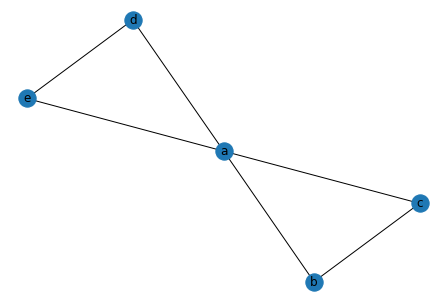

In [5]:
nx.draw(T,with_labels=True)

In [6]:
sp = dict(nx.all_pairs_shortest_path(T))

In [7]:
def Degree_Centrality(X):
    listx = X.nodes()
    den = len(listx)-1
    for i in listx:
        print('Neighbors of ',i,' are ',list(X.neighbors(i)),' \n=Degree(',i,'):',X.degree(i))
        dc = X.degree(i)/den
        print('>>> Degree Centrality of ',i,' is ',dc,'\n')

In [8]:
Degree_Centrality(T) 

Neighbors of  a  are  ['b', 'd', 'c', 'e']  
=Degree( a ): 4
>>> Degree Centrality of  a  is  1.0 

Neighbors of  b  are  ['a', 'c']  
=Degree( b ): 2
>>> Degree Centrality of  b  is  0.5 

Neighbors of  c  are  ['a', 'b']  
=Degree( c ): 2
>>> Degree Centrality of  c  is  0.5 

Neighbors of  d  are  ['a', 'e']  
=Degree( d ): 2
>>> Degree Centrality of  d  is  0.5 

Neighbors of  e  are  ['a', 'd']  
=Degree( e ): 2
>>> Degree Centrality of  e  is  0.5 



In [9]:
def Betweness_Centrality(X):
    sp = dict(nx.all_pairs_shortest_path(X))
    listx = []
    listy = []
    temp_list=[]
    v = len(X.nodes())
    den = ((v-1)*(v-2))/2

    for i in sp:
        for j in sp[i]:
            if i==j:
                continue
            elif set([i,j]) in listx:
                continue
            else:
                if i in temp_list:
                    tot = tot+1
                print("Shortest Path between", i, "and", j, "is", sp[i][j])

    #             if len(sp[i][j])>2:
    #                 listy.append(sp[i][j])
                if set([i,j]) not in listx:
                    listx.append(set([i,j]))
    #             print(listx)
            temp_list=sp[i][j]
            temp_list.pop(0)
            temp_list.pop(-1)
            listy.extend(temp_list)
    #         print(temp_list)
    tot = 0
    for i in sp:
        print(">>>Betweness Centrality of",i,"is",listy.count(i)/den)

            

In [10]:
Betweness_Centrality(T)

Shortest Path between a and b is ['a', 'b']
Shortest Path between a and d is ['a', 'd']
Shortest Path between a and c is ['a', 'c']
Shortest Path between a and e is ['a', 'e']
Shortest Path between b and c is ['b', 'c']
Shortest Path between b and d is ['b', 'a', 'd']
Shortest Path between b and e is ['b', 'a', 'e']
Shortest Path between c and d is ['c', 'a', 'd']
Shortest Path between c and e is ['c', 'a', 'e']
Shortest Path between d and e is ['d', 'e']
>>>Betweness Centrality of a is 0.6666666666666666
>>>Betweness Centrality of b is 0.0
>>>Betweness Centrality of c is 0.0
>>>Betweness Centrality of d is 0.0
>>>Betweness Centrality of e is 0.0


In [11]:
def Closeness_Centrality(X):
    spl = dict(nx.all_pairs_shortest_path_length(X))
    num = len(X.nodes())-1
    for i in spl:
        tot_dist = 0
        for j in spl[i]:
            tot_dist = tot_dist + spl[i][j]
            print("Distance between ",i," and",j,"is",spl[i][j])
        print("=Total Distance of ",i,"is",tot_dist)
        cc = num/tot_dist
        print(">>>Closeness Centrality of",i,"is",cc,"\n")

In [12]:
Closeness_Centrality(T)

Distance between  a  and a is 0
Distance between  a  and c is 1
Distance between  a  and d is 1
Distance between  a  and b is 1
Distance between  a  and e is 1
=Total Distance of  a is 4
>>>Closeness Centrality of a is 1.0 

Distance between  b  and b is 0
Distance between  b  and c is 1
Distance between  b  and a is 1
Distance between  b  and d is 2
Distance between  b  and e is 2
=Total Distance of  b is 6
>>>Closeness Centrality of b is 0.6666666666666666 

Distance between  c  and c is 0
Distance between  c  and a is 1
Distance between  c  and b is 1
Distance between  c  and d is 2
Distance between  c  and e is 2
=Total Distance of  c is 6
>>>Closeness Centrality of c is 0.6666666666666666 

Distance between  d  and d is 0
Distance between  d  and a is 1
Distance between  d  and e is 1
Distance between  d  and b is 2
Distance between  d  and c is 2
=Total Distance of  d is 6
>>>Closeness Centrality of d is 0.6666666666666666 

Distance between  e  and e is 0
Distance between  e  an

In [13]:
def draw():
    Z = nx.Graph()
    nodes = []
    n = int(input("Enter Number of Nodes: "))
    for i in range(0,n):
        ele = input("Enter Nodes:")
        nodes.append(ele)
    Z.add_nodes_from(nodes)
    edges = []
    m = int(input("Enter Number of Edges: "))
    for j in range(0,m):
        inp = input("Enter Edges: ")
        check = inp.split()
        if check[0] not in nodes:
            print("Sorry "+check[0]+" is not in list of nodes.")
            break
        if check[1] not in nodes:
            print("Sorry "+check[0]+" is not in list of nodes.")
            break
        edges.append(tuple(inp.split()))
    Z.add_edges_from(edges)

    print(nx.info(Z))
    ans = input("Draw The Graph As: \n A. Circular \n B. Random \n C. Spectral \n D. Spring \n E. Shell \n" )
    
#     valid = ["A","a","B","b","C","c","D","d","E","e"]
    
    while (True):
        print(ans)
        if (ans == "A" or ans =="a"):
            nx.draw_circular(Z,with_labels=True,node_color="red")
            break
        elif (ans == "B" or ans == "b"):
            nx.draw_random(Z,with_labels=True)
            break
        elif (ans == "C" or ans == "c"):
            nx.draw_spectral(Z,with_labels=True)
            break
        elif (ans == "D" or ans == "d"):
            nx.draw_spring(Z,with_labels=True)
            break
        elif (ans == "E" or ans == "e"):
            nx.draw_shell(Z,with_labels=True)
            break
        else:
            print("Invalid Input")
    